In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy

import geopandas
import cartopy.io.shapereader as shpreader
import shapely

import seaborn as sns

In [2]:
degrees = 2.5
tdf = pd.read_csv(f'../data/study_da_6 - Temperature - upper_pred_{degrees}.csv')
tdf["da_var"] = "Temperature"
pdf = pd.read_csv(f'../data/study_da_6 - Precipitation - upper_pred_{degrees}.csv')
pdf["da_var"] = "Precipitation"

df = pd.concat([tdf,pdf])

df = df[pd.notna(df["gridcells"]) & df["gridcells"]>0]

df["da_trend_p"] = df["da_trend_cells"] / df["gridcells"]

df["da_trend_cat"] = None

df.loc[df['da_trend_p']==0,"da_trend_cat"] = "A. 0==DA"
df.loc[df['da_trend_p']>0,"da_trend_cat"] = "B. 0<DA<0.5"
df.loc[df['da_trend_p']>0.5,"da_trend_cat"] = "C. DA>0.5"

places =  pd.read_csv('../data/place_df.csv')

In [3]:
cat_df = pd.read_csv('../data/1_predicted_category_documents.csv')

df = df.merge(cat_df[["id","PY"]])

In [4]:
pred_cats = [
    "12 - Terrestrial ES - mean_prediction",
    "12 - Coastal and marine Ecosystems - mean_prediction",
    "12 - Mountains, snow and ice - mean_prediction",
    "12 - Rivers, lakes, and soil moisture - mean_prediction",
    "12 - Human and managed - mean_prediction"  
]

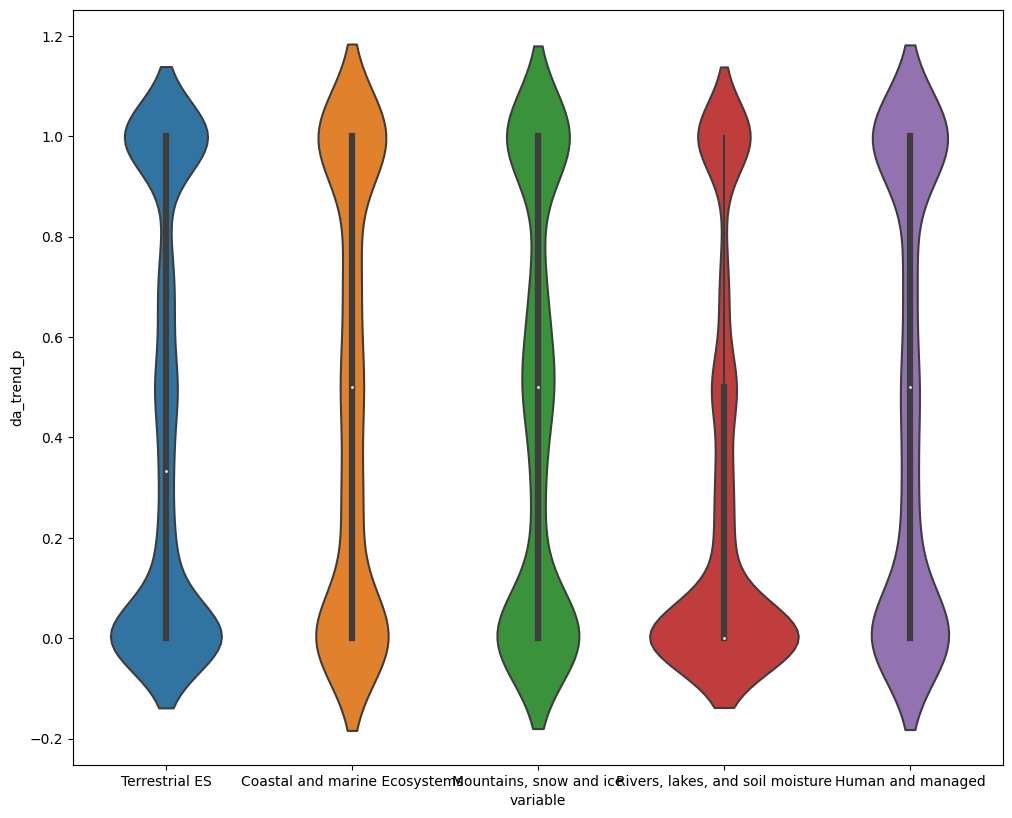

In [5]:
#fig, ax = plt.subplots(dpi=150, figsize=(3.5, 3))

fig, ax = plt.subplots(dpi=100, figsize=(12, 10))

pdf = (df[['id','da_trend_p']+pred_cats]
       .melt(id_vars=["id","da_trend_p"])
       .query('value>0.5')
       #.groupby(['PY','continent','variable'])['value']
       #.aggregate("count")
       #.reset_index()
       #.query('PY<2020')
       #.query('continent!="AN"')
       #.query('PY>1990')
       #.rename(columns={"value":"N studies"})
      )
pdf["variable"] = pdf["variable"].str.split(' - ').str[1]
pdf.head()
sns.violinplot(x="variable",y="da_trend_p", data=pdf)
#sns.swarmplot(x="variable",y="da_trend_p", data=pdf)

#sns.relplot("PY","N studies",hue="continent",data=pdf,col="variable", col_wrap=3,kind="line",facet_kws={'sharey': False, 'sharex': True})

In [6]:
pdf = (df[['id','da_trend_cat','PY']])

pdf.head()

,id,da_trend_cat,PY
0,13201,A. 0==DA,1992.0
1,1544528,C. DA>0.5,2017.0
2,1287688,A. 0==DA,2014.0
3,1506997,A. 0==DA,2017.0
4,3783113,C. DA>0.5,2020.0


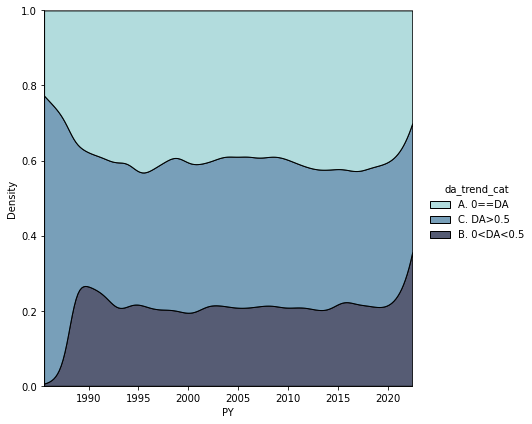

In [7]:
sns.displot(
    data=pdf, x="PY", hue="da_trend_cat", kind="kde",
    height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)

In [8]:
pdf = (df[['id','da_trend_cat']+pred_cats]
       .melt(id_vars=["id","da_trend_cat"])
       .query('value>0.5')
       .groupby(['da_trend_cat','variable'])['value']
       .aggregate("count")
       .to_frame()
       .reset_index()
      )
#pdf['share'] = pdf['value'] / pdf[]
#pdf["variable"] = pdf["variable"].str.split(' - ').str[1]
pdf.head()

,da_trend_cat,variable,value
0,A. 0==DA,12 - Coastal and marine Ecosystems - mean_pred...,713
1,A. 0==DA,12 - Human and managed - mean_prediction,926
2,A. 0==DA,"12 - Mountains, snow and ice - mean_prediction",849
3,A. 0==DA,"12 - Rivers, lakes, and soil moisture - mean_p...",3213
4,A. 0==DA,12 - Terrestrial ES - mean_prediction,3681


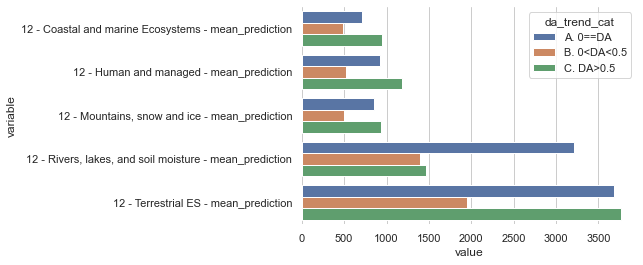

In [9]:
sns.set_theme(style="whitegrid")
sns.set_color_codes("muted")
sns.barplot(y="variable",x="value",hue="da_trend_cat", data=pdf)
sns.despine(left=True, bottom=True)


bottom [0. 0. 0. 0. 0.]
share [0.33240093 0.35222518 0.37335092 0.52880184 0.3919293 ]
bottom [0.33240093 0.35222518 0.37335092 0.52880184 0.3919293 ]
share [0.22470862 0.19931533 0.21811785 0.229921   0.20719761]
bottom [0.55710956 0.55154051 0.59146878 0.75872284 0.59912692]
share [0.44289044 0.44845949 0.40853122 0.24127716 0.40087308]


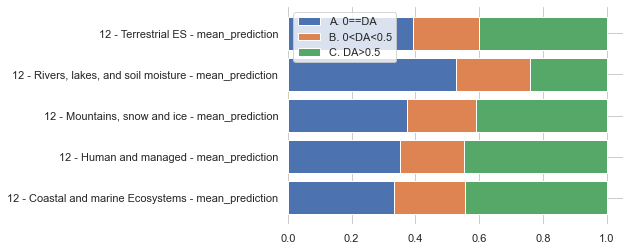

In [21]:
pdf['share'] = pdf['value'] /  pdf.groupby('variable')['value'].transform('sum')

fig, ax = plt.subplots()

sns.set_theme(style="whitegrid")
sns.set_color_codes("muted")
bottom = np.zeros(len(pdf.groupby('variable')))
for name, group in pdf.groupby('da_trend_cat'):
    ax.barh(group['variable'], group['share'], data=group, left=bottom, label=name)
    print("bottom", bottom)
    bottom+=group['share'].values
    print("share", group['share'].values)
    
ax.legend()
sns.despine(left=True, bottom=True)

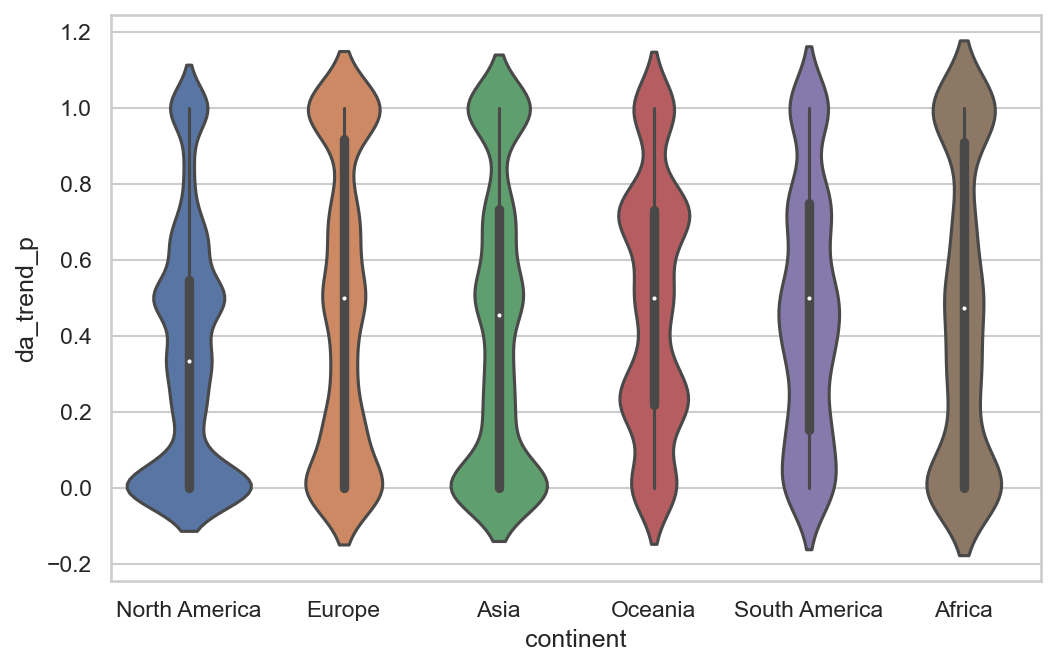

In [22]:
doc_continents = pd.read_csv('../data/doc_continents.csv').merge(df, left_on="doc_id", right_on="id")

doc_continents = doc_continents[doc_continents['da_data_cells']>1]

fig, ax = plt.subplots(dpi=150, figsize=(8, 5))

pdf = (doc_continents[['id','da_trend_p','continent']])
pdf.head()
sns.violinplot(x="continent",y="da_trend_p", data=pdf)



In [28]:
pdf = (doc_continents[['id','da_trend_cat','continent']]
       .groupby(['da_trend_cat','continent'])['id']
       .aggregate("count")
       .to_frame()
       .reset_index()
      )

pdf.head()

,da_trend_cat,continent,id
0,A. 0==DA,Africa,499
1,A. 0==DA,Asia,1390
2,A. 0==DA,Europe,958
3,A. 0==DA,North America,2005
4,A. 0==DA,Oceania,236


bottom [0. 0. 0. 0. 0. 0.]
share [0.29011628 0.29517944 0.25263713 0.30798771 0.13972765 0.14757104]
bottom [0.29011628 0.29517944 0.25263713 0.30798771 0.13972765 0.14757104]
share [0.32267442 0.33616479 0.33808017 0.44116743 0.42451155 0.48212649]
bottom [0.6127907  0.63134423 0.5907173  0.74915515 0.56423919 0.62969753]
share [0.3872093  0.36865577 0.4092827  0.25084485 0.43576081 0.37030247]


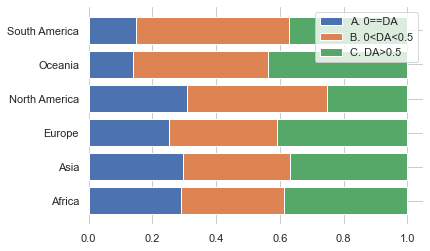

In [31]:
pdf['share'] = pdf['id'] /  pdf.groupby('continent')['id'].transform('sum')

fig, ax = plt.subplots()

sns.set_theme(style="whitegrid")
sns.set_color_codes("muted")
bottom = np.zeros(len(pdf.groupby('continent')))
for name, group in pdf.groupby('da_trend_cat'):
    ax.barh(group['continent'], group['share'], data=group, left=bottom, label=name)
    print("bottom", bottom)
    bottom+=group['share'].values
    print("share", group['share'].values)
    
ax.legend()
sns.despine(left=True, bottom=True)